<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab5/lineFitLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
from scipy import optimize
import numpy as np
from matplotlib import pylab as pl

# create synthetic data for line fitting




In [0]:
np.random.seed(555)

Creating the exogenous variable

In [0]:
x_vals = np.random.rand(100) * 10

In [0]:
print(x_vals)

[7.17834087 0.47855133 9.44471978 6.8638004  5.81207334 1.42678616
 9.45919181 3.39990587 6.20435458 4.52959644 2.3976742  0.34504591
 1.48593113 8.10866174 6.53105376 5.44468685 0.41194765 4.68166251
 8.88746733 4.76258557 4.12488984 6.16106538 3.21416554 5.80869263
 3.9661405  0.20091368 4.31395898 4.11244512 6.29061747 5.02521894
 1.6212784  6.66897061 1.35272291 1.69937536 2.20830313 0.86670475
 0.46840069 0.28908051 4.3867962  8.08565064 6.13362455 6.6097222
 9.28622121 4.87345755 6.38178521 1.85093821 2.50653771 4.46628009
 9.72624065 4.67703036 4.07470269 7.86091879 3.71535104 2.20143415
 3.07846727 2.86184245 1.47343012 7.42969034 7.94321078 3.2902046
 0.62102981 9.66696377 0.34688228 7.92288645 0.2252943  1.59693565
 1.46141363 8.8278803  1.89545066 3.34775168 4.09820686 0.57803204
 5.42383827 8.46712172 8.24706115 2.40896531 5.14537387 3.54767054
 9.68326953 7.49548167 7.28264277 8.45389758 4.05044473 1.08512712
 7.52632771 5.87102173 5.91753381 8.95891913 5.89576732 1.416377

In [0]:
np.random.rand?

create the y values

In [0]:
def line(x, a, b):
  """
  Takes two parameters (a and b) along with an array of x values. Returns y array.
  """
  
  return a * x + b

In [0]:
line?

In [0]:
y_vals = line(x_vals, 4, 3)

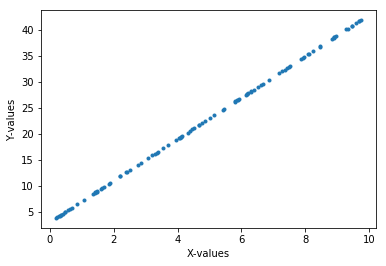

In [0]:
pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");

In [0]:
pl.plot?

adding some scatter

In [0]:
scattered_y = np.random.randn(100) * 5

In [0]:
y_vals += scattered_y

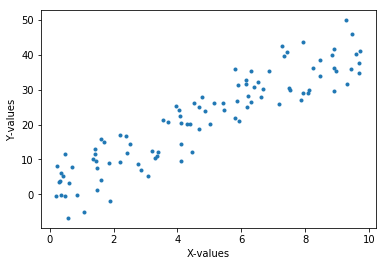

In [0]:
pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");

adding uncertainties as well

In [0]:
uncertanties = np.random.randn(100) * 7

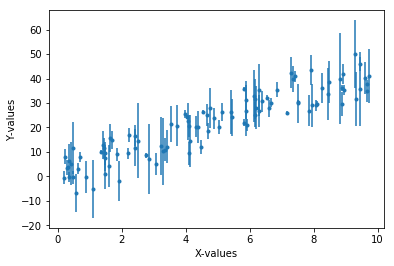

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");

# fit a line to data with scipy

In [0]:
popt, pcov = sp.optimize.curve_fit(line, x_vals, y_vals, p0=[5, 0])

In [0]:
pcov

array([[ 0.03279955, -0.15642658],
       [-0.15642658,  1.02770122]])

In [0]:
# this is the buggy code

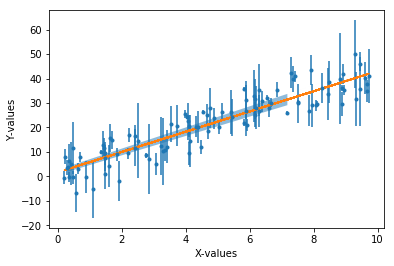

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), 
        "-")
#adding uncertainty band: the covariance contains:

#|pcov[0][0] . pcov[0][1] | =  |sigma_slope^2                  slope-intercept covariance |
#|pcov[1][0] . pcov[1][1] |    |slope-intercept covariance              sigma_intercept^2 |


pl.fill_between(x_vals, 
                line(x_vals, popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(x_vals, popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)

pl.xlabel("X-values")
pl.ylabel("Y-values");



the bug was because the data  was not sorted along the x axis. The shaded region got plotted up to the last value given. To sort the data I create an array that gives me the sorted indices with np.argsort, and then I index the x array by that 

In [0]:
sorter = np.argsort(x_vals)


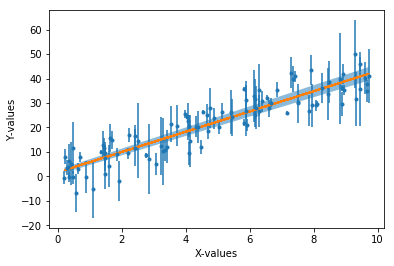

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), 
        "-")

pl.fill_between(x_vals[sorter], 
                line(x_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(x_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)

pl.xlabel("X-values")
pl.ylabel("Y-values");



# fit a line to data with sklearn 
(the standard library for machine learning)

In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


sklearn is object oriented: I have to create a regressor object

In [0]:
regr = skl.linear_model.LinearRegression()


then I can fit the object to the data

In [0]:
regr.fit(np.atleast_2d(x_vals).T, y_vals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

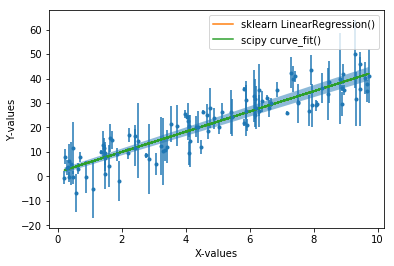

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");
pl.plot(x_vals, regr.predict(np.atleast_2d(x_vals).T), '-', label="sklearn LinearRegression()")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), 
        "-", label="scipy curve_fit()")

pl.fill_between(x_vals[sorter], 
                line(x_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(x_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)
pl.legend()
pl.xlabel("X-values")
pl.ylabel("Y-values");



are you surprised that they are different? remember we did not use the uncertainties with sklearn! can you include the uncertainties? investigate by looking at the signature of LinearRegression()

In [0]:
#this is the R^2 score https://en.wikipedia.org/wiki/Coefficient_of_determination
np.round(regr.score(np.atleast_2d(x_vals).T, y_vals), 2)


0.84

# cross validation
Let's do a "cross validation" on this model: set 75% of the data as training and the rest as test. (the way . am about to split the data into training/test is not ideal. Can you tell me why? the first to a nswer on slack gets +0.5 points on their next homework!)

In [0]:
regr.fit(np.atleast_2d(x_vals[:75]).T, y_vals[:75])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
np.round(regr.score(np.atleast_2d(x_vals[:75]).T, y_vals[:75]), 2)


0.84

In [0]:
np.round(regr.score(np.atleast_2d(x_vals[75:]).T, y_vals[75:]), 2)


0.81

the lower score in the test set is expected: the model is not trained on these data. But if the 2 scvores diverge significantly that is a symptom of overfitting